<a href="https://colab.research.google.com/github/javachka11/Laba_4/blob/main/Sem6_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [142]:
def phi_1(x):
  return np.heaviside(x - 1, 1)*np.heaviside(2 - x, 1)

def phi_2(x):
  return (np.sin(np.pi*x/2)**2) * np.heaviside(x, 1) * np.heaviside(2 - x, 1)

def phi_3(x):
  return np.exp(-x) * np.heaviside(x, 1) * np.heaviside(2 - x, 1)

> 1) Класс CarryTask отвечает за параметры задачи переноса, численное решение которой требуется найти.

> 2) Класс Iterator отвечает за прогон по сетке вдоль оси t. Метод next() при каждом вызове записывает новый слой в поле arr.

> 3) Класс Net содержит сетку значений на оси x от a до b (параметры задачи), шаг по координате h и шаг по времени tau.

In [20]:
class CarryTask:
  def __init__(self, t0, start, end, phi, task_type, a):
    self.t0 = t0
    self.start = start
    self.end = end
    self.task_type = task_type
    if task_type == 'linear':
      self.a = a
    else:
      self.a = None
    self.phi = phi

class Iterator:
  def __init__(self):
    self.arr = []

  def next(self, arr):
    self.arr = arr[:]

  def current(self):
    return self.arr

  def get(self, i):
    return self.arr[i]

class Net:
  def __init__(self, task, h, tau):
    self.arr = np.arange(task.start, task.end, h)
    self.h = h
    self.tau = tau
    self.len = len(self.arr)

Разностная схема Лакса-Фридрихса

In [140]:
def LF(t, ct, net, iter):
  if t == ct.t0:
    iter.next([ct.phi(x) for x in net.arr])
  else:
    if ct.task_type == 'first':
      arr = [1/2*(iter.get(i+1) + iter.get(i-1)) - 
               net.tau/(2*net.h)*(ct.a*iter.get(i+1)-ct.a*iter.get(i-1))
               for i in range(1, net.len-1)]
    elif ct.task_type == 'second':
      arr = [1/2*(iter.get(i+1) + iter.get(i-1)) - 
               net.tau/(4*net.h)*(iter.get(i+1)**2 - iter.get(i-1)**2)
               for i in range(1, net.len-1)]
    else:
      arr = [1/2*(iter.get(i+1) + iter.get(i-1)) - 
               net.tau/(2*net.h)*(np.sin(iter.get(i+1)) - np.sin(iter.get(i-1)))
               for i in range(1, net.len-1)]
    arr.insert(0, 0); arr.insert(net.len, 0)
    iter.next(arr)

In [95]:
def solver(t, ct, net, iter, ax, x_min=0, x_max=10, y_min=0, y_max=2):
  LF(t, ct, net, iter)
  ax.clear()
  ax.axis((x_min, x_max, y_min, y_max))
  line = ax.plot(net.arr, iter.current())
  return line

In [144]:
def task_1():
  fig, ax = plt.subplots()

  ct = CarryTask(t0=0, start=0, end=10,
                 phi=phi_1,
                 task_type='first', a=1)
  iter = Iterator()
  net = Net(task=ct, h=0.05, tau=0.05)

  t_arr = np.arange(ct.t0, ct.t0 + 100, net.tau)

  tt_animation = animation.FuncAnimation(fig,
                                      solver,
                                      frames=t_arr,
                                      fargs = (ct, net, iter, ax),
                                      interval = 10,
                                      repeat = False)
  tt_animation.save('carry_task_1.gif',
                    writer = 'pillow',
                    fps = 30)

  '''t = 0
  for i in range(100):
    LF(t, ct, net, iter)
    print(iter.current()[10:-10])
    t += net.tau'''

def task_2():
  fig, ax = plt.subplots()

  ct = CarryTask(t0=0, start=0, end=10,
                 phi=phi_2,
                 task_type='second', a=1)
  iter = Iterator()
  net = Net(task=ct, h=0.05, tau=0.05)

  t_arr = np.arange(ct.t0, ct.t0 + 100, net.tau)

  tt_animation = animation.FuncAnimation(fig,
                                      solver,
                                      frames=t_arr,
                                      fargs = (ct, net, iter, ax),
                                      interval = 10,
                                      repeat = False)
  tt_animation.save('carry_task_2.gif',
                    writer = 'pillow',
                    fps = 30)
  
  '''t = 0
  for i in range(100):
    LF(t, ct, net, iter)
    print(iter.current())
    t += net.tau'''

def task_3():
  fig, ax = plt.subplots()

  ct = CarryTask(t0=0, start=0, end=10,
                 phi=phi_3,
                 task_type='third', a=1)
  iter = Iterator()
  net = Net(task=ct, h=0.05, tau=0.05)

  t_arr = np.arange(ct.t0, ct.t0 + 100, net.tau)

  tt_animation = animation.FuncAnimation(fig,
                                      solver,
                                      frames=t_arr,
                                      fargs = (ct, net, iter, ax),
                                      interval = 10,
                                      repeat = False)
  tt_animation.save('carry_task_3.gif',
                    writer = 'pillow',
                    fps = 30)

  '''t = 0
  for i in range(100):
    LF(t, ct, net, iter)
    print(iter.current()[10:-10])
    t += net.tau'''

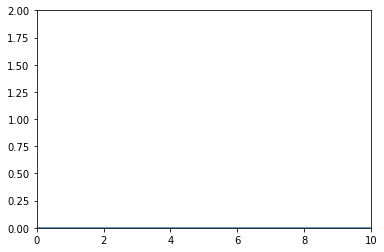

In [145]:
task_3()